### Overview
###### Build a model to predict whether a person will remain in a hypothetical trade union, the United Data Scientists Union (UDSU).

Assume a country with a major trade union for data scientists. Each member pays some dues amount to it each month and gets various benefits such as representation with employers and continuing education. You will be provided a dataset of 1,000 data scientist IDs by your instructor in Week 2. Each ID represents a data scientist who is a current or former member. Your dataset will contain several features such as:

- Whether the person is a member of the management
- Number of months the particular data scientist has been a member of the UDSU
- Financial dues paid (each month, and in total)
- Gender of the person
- Status (still a union member; or no longer a member)

### Your Objective

Utilizing your custom TRAIN dataset (provided in a comma-separated values file Yourname-TRAIN.csv, build a model that can predict whether a data scientist will remain a USDU member.

Each dataset will contain both numerical and categorical features. There will be some outliers, some missing values, and some colinear features.

Your dataset must be cleansed and normalized/standardized. You will likely want to split it into a training set and a test set.

### Assignment Requirements

- Data must be cleansed and normalized (a topic covered in week 2)
- The project must contain charts and graphs, statistically describing the data features. At a minimum include a:
    - Box (or Violin) and Whisker plot of data features
    - Scree plot of primary components
    - Scatter plot of the data
    - Bivariate plots between key feature
- Final capstone model must predict UDSU loyalty using at least three of the following methods:
    - Linear regression (basic statistics)
    - Decision Tree (a topic covered in week 5)
    - Support Vector Machine (a topic covered in week 8)
    - Random Forest (a topic covered in week 5)
    - Neural Network (a topic covered in week 3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Anusha-TRAIN.csv")

In [2]:
# Drop the ID column
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)

# Strip whitespaces from column names
df.columns = df.columns.str.strip()

In [3]:
# Find the 95th percentile of the 'MonthsInUnion' column
q = df['MonthsInUnion'].quantile(0.95)

# Filter the dataframe to exclude outliers
df = df[df['MonthsInUnion'] < q]

In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize numeric columns
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df.select_dtypes(include='number'))
normalized_df = pd.DataFrame(normalized_data, columns=df.select_dtypes(include='number').columns)

In [5]:
# Convert categorical variables to dummy variables
cat_cols = ['gender', 'USAcitizen', 'Married', 'ContinuingEd', 'FeatureA', 'FeatureB', 'FeatureC', 'FeatureD', 'FeatureE', 'FeatureF', 'FeatureG', 'Connectivity', 'DuesFrequency', 'PaperlessBilling', 'PaymentMethod']
df1 = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df1.drop('LeftUnion', axis=1)
y = df1['LeftUnion']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (756, 31)
y_train shape:  (756,)
X_test shape:  (190, 31)
y_test shape:  (190,)


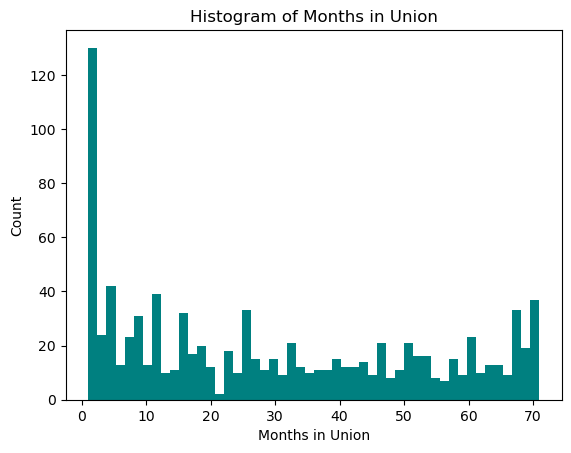

In [7]:
plt.hist(df['MonthsInUnion'], bins=50, color='teal')
plt.xlabel('Months in Union')
plt.ylabel('Count')
plt.title('Histogram of Months in Union')
plt.show()

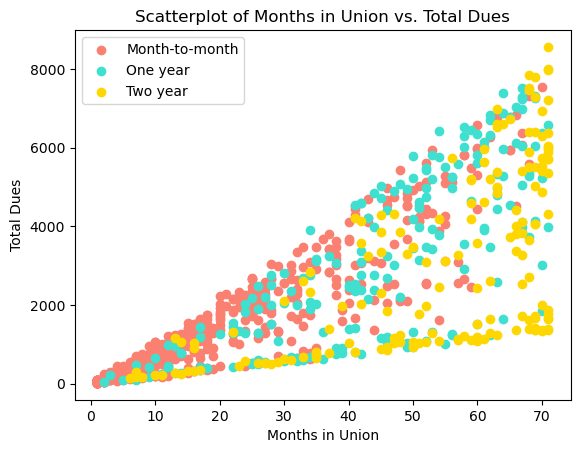

In [8]:
# Dictionary to map values to colors
color_map = {'Month-to-month': 'salmon', 'One year': 'turquoise', 'Two year': 'gold'}

# Create a scatterplot with different colors for each value of the "DuesFrequency" column
for dues, color in color_map.items():
    plt.scatter(df[df['DuesFrequency'] == dues]['MonthsInUnion'], 
                df[df['DuesFrequency'] == dues]['TotalDues'], 
                color=color, label=dues)

plt.xlabel('Months in Union')
plt.ylabel('Total Dues')
plt.title('Scatterplot of Months in Union vs. Total Dues')
plt.legend()

plt.show()

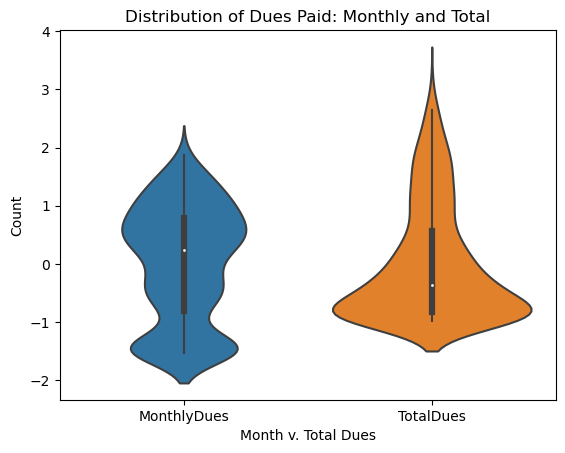

In [9]:
# Remove 'Management' and 'MonthsInUnion' column from normalized dataset
violin_df = normalized_df.drop(['Management', 'MonthsInUnion'], axis=1)

# Violinplot of numeric features
sns.violinplot(data=violin_df)
plt.title("Distribution of Dues Paid: Monthly and Total")
plt.xlabel("Month v. Total Dues")
plt.ylabel("Count")

plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical y_train and y_test from Yes and No to 1 and 0 respectively
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = lr_model.predict(X_test)

# Calculate the mean squared error
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Linear Regression Model MSE:", mse_lr)

Linear Regression Model MSE: 0.16517676975645257


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("Decision Tree Model MSE:", mse_dt)

Decision Tree Model MSE: 0.2631578947368421


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest Model MSE:", mse_rf)

Random Forest Model MSE: 0.24736842105263157


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("SVM Model Accuracy:", accuracy_svm)

SVM Model Accuracy: 0.7368421052631579
